In [103]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [105]:
heart_df = pd.read_csv('heart.csv')

In [107]:
print("Heart Disease Dataset Columns:") 
print(heart_df.columns) 

Heart Disease Dataset Columns:
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [109]:
print("Missing values before cleaning:")
print("Heart Dataset:", heart_df.isnull().sum().sum())


Missing values before cleaning:
Heart Dataset: 0


In [111]:
print("Missing values after cleaning:")
print("Heart Dataset:", heart_df.isnull().sum().sum())

Missing values after cleaning:
Heart Dataset: 0


In [113]:
def perform_eda(df, title):
    print(f"EDA for {title}")
    print(df.head())
    print(df.info())
    print(df.describe())
    plt.show()

perform_eda(heart_df, "Heart Disease")

EDA for Heart Disease
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 n

In [115]:
def preprocess_data(df, target_column):
    X = df.drop(columns=[target_column])
    y = df[target_column]
    # Handle missing values (if any)
    X.fillna(X.mean(), inplace=True)
    # Standardize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    return train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [117]:
X_train_heart, X_test_heart, y_train_heart, y_test_heart = preprocess_data(heart_df, 'target')

In [119]:
model=DecisionTreeClassifier()

In [121]:
model.fit(X_train_heart, y_train_heart)
y_pred = model.predict(X_test_heart)
accuracy = accuracy_score(y_test_heart, y_pred)
print(f"Accuracy of {model}: {accuracy}")
print(confusion_matrix(y_test_heart, y_pred))
print(classification_report(y_test_heart, y_pred))

Accuracy of DecisionTreeClassifier(): 0.819672131147541
[[26  3]
 [ 8 24]]
              precision    recall  f1-score   support

           0       0.76      0.90      0.83        29
           1       0.89      0.75      0.81        32

    accuracy                           0.82        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.83      0.82      0.82        61



In [123]:
def plot_feature_importance(model, X_train, title):
    importance = model.feature_importances_
    features = pd.DataFrame({'Feature': X_train.columns, 'Importance': importance})
    features = features.sort_values(by='Importance', ascending=False)
    
    plt.figure(figsize=(6,4))
    sns.barplot(x='Importance', y='Feature', data=features)
    plt.title(f"Feature Importance for {title}")
    plt.show()

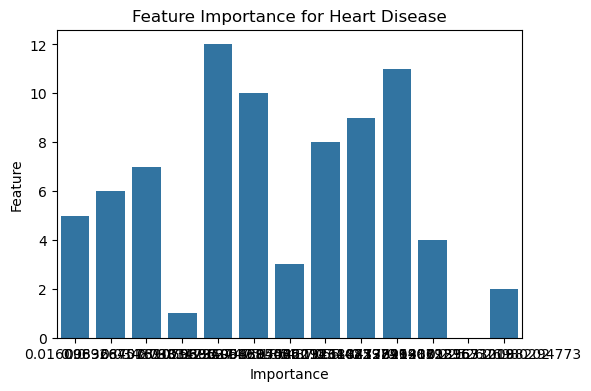

In [125]:
rf_heart = DecisionTreeClassifier()
rf_heart.fit(X_train_heart, y_train_heart)
plot_feature_importance(rf_heart, pd.DataFrame(X_train_heart), "Heart Disease")

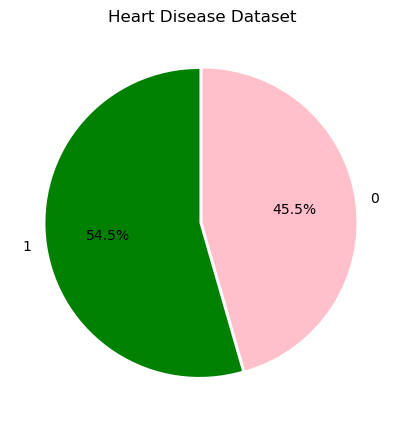

In [127]:
def plot_pie_chart(df, target_column, title): 
    counts = df[target_column].value_counts() 
    plt.figure(figsize=(6, 5)) 
    colors=['green','pink']
    explode=(0.02,0)
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90,colors=colors,explode=explode) 
    plt.title(title) 
    plt.show() 
# Plotting pie charts 
plot_pie_chart(heart_df, 'target', 'Heart Disease Dataset') 

In [129]:
input_data_heart = (0,120,66,49,175,25.8,0.587,51,76,99,45,0.649,357)

# changing the input_data to numpy array
input_data_heart_as_numpy_array = np.asarray(input_data_heart)

# reshape the array as we are predicting for one instance
input_data_heart_reshaped = input_data_heart_as_numpy_array.reshape(1,-1)

model=DecisionTreeClassifier()

model.fit(X_train_heart, y_train_heart)
y_pred = model.predict(X_test_heart)
accuracy = accuracy_score(y_test_heart, y_pred)
print(f"Accuracy of {model}: {accuracy}")
print(confusion_matrix(y_test_heart, y_pred))
print(classification_report(y_test_heart, y_pred))
prediction = model.predict(input_data_heart_reshaped)
if (prediction[0] == 0):
    print(f'The person doesnot have heart disease according to {model}')
else:
    print(f'The person is having heart disease according to {model}')
           
# Example usage with dummy data (replace with actual data)
X_train = np.random.rand(100, 8) 
y_train = np.random.randint(2, size=100) 
X_test = np.random.rand(20, 8) 
y_test = np.random.randint(2, size=20) 


Accuracy of DecisionTreeClassifier(): 0.819672131147541
[[25  4]
 [ 7 25]]
              precision    recall  f1-score   support

           0       0.78      0.86      0.82        29
           1       0.86      0.78      0.82        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61

The person doesnot have heart disease according to DecisionTreeClassifier()


In [131]:
import pickle

In [133]:
filename = 'heart_disease_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [135]:
# loading the saved model
loaded_model = pickle.load(open('heart_disease_model.sav', 'rb'))

In [137]:
for column in heart_df.columns:
  print(column)

age
sex
cp
trestbps
chol
fbs
restecg
thalach
exang
oldpeak
slope
ca
thal
target
